<a href="https://colab.research.google.com/github/Mintu-Vipin/NPowerCanada_JuniorDataAnalyst/blob/main/Course7Week5_Prediction_of_marks_of_a_student_based_on_the_number_of_hours_he_she_studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of marks of a student based on the number of hours he/she studies**

Dataset: https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv

# Dataset Description:


*   Hours : No of hrs studied
*   Score : Mark percentage




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Read the data from the provided link
filepath = 'https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv'
df = pd.read_csv(filepath)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Understand the data by reading first 5 and last 5 records from the dataset
print(df.head())
print(df.tail())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
# Check the shape of data
df.shape

(25, 2)

In [5]:
# Check if there is any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Display the summary of the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


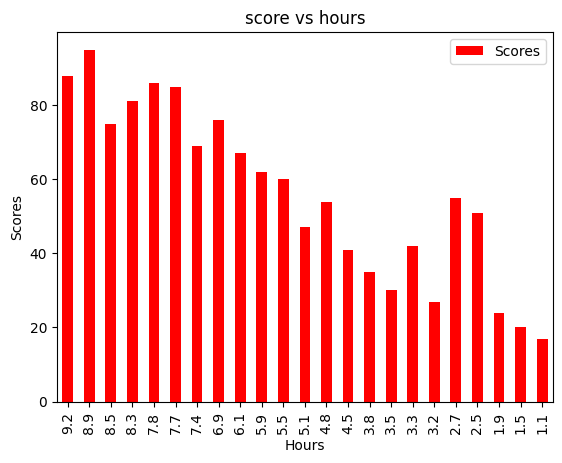

In [7]:
# Group the data using score and hours, then Using bar chart ,plot score vs hours. The
# next phase is to enter distribution scores and plot them according to the requirement,
# here we are going to enter the title, x_label, and y_label, and show it according to the
# desired result.


# Group the data by score and hours
grouped_data = df.groupby("Hours")[["Scores"]].sum().sort_values(by = "Hours", ascending = False)
grouped_data

# Bar chart
grouped_data[:].plot.bar(color = 'red')
plt.title('score vs hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

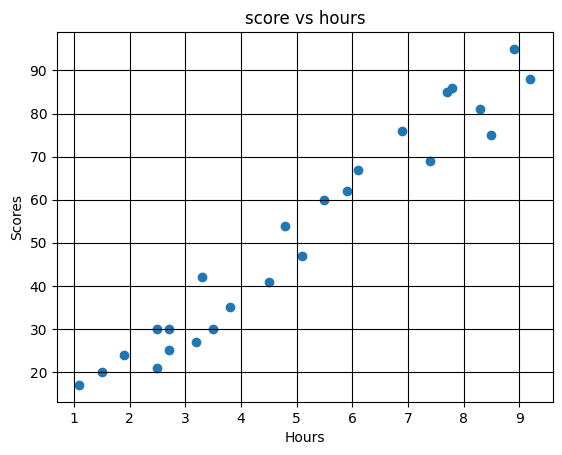

In [8]:
#  Visualize distribution of data using scatter plot
plt.scatter(df['Hours'], df['Scores'])
plt.title('score vs hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(color="black")
plt.show()

In [9]:
# Prepare the data by splitting it into Training and Test set (80-20)
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(0.0, 101.81225666847268)

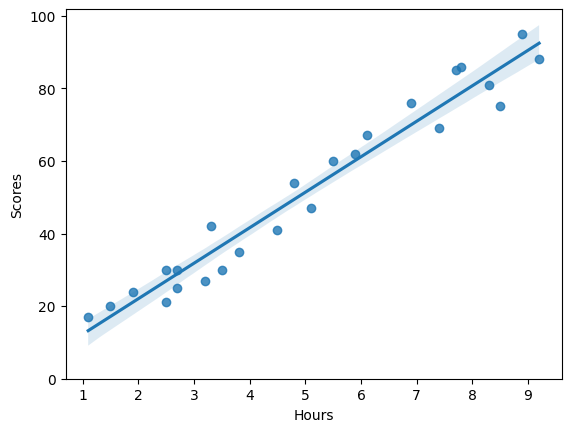

In [10]:
# Plot the regression line
sns.regplot(x = 'Hours', y = 'Scores', data=df)
plt.ylim(0,)

Score 0.9491209376364416
Training Data:
    Actual  Predicted
9       25  28.968503
13      42  34.777750
1       47  52.205491
22      35  39.618789
5       20  17.350010
2       27  33.809542
12      41  46.396244
15      95  88.997388
3       75  85.124557
4       30  36.714166
20      30  28.968503
17      24  21.222841
21      54  49.300867
18      67  61.887569
24      86  78.347102
7       60  56.078322
10      85  77.378894
14      17  13.477178
19      69  74.474271
6       88  91.902011

Test Data:
    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


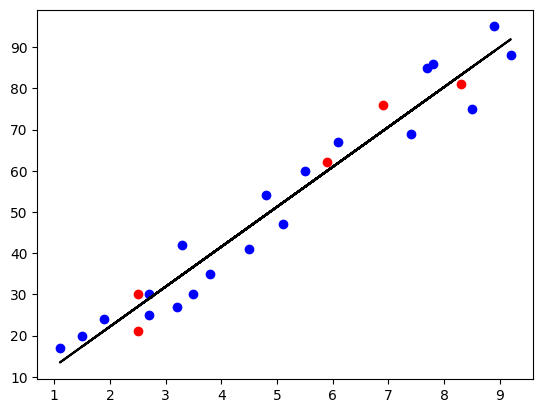

In [11]:
# Plot the training and test data . Predict the score and compare predicted and actual score

# Predict the score
lm = LinearRegression()
lm.fit(X_train,y_train)
print(f'Score {lm.score(X_train, y_train)}')

# Plotting training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plotting testing data
plt.scatter(X_test, y_test, color='red', label='Testing Data')

regline=lm.coef_*X+lm.intercept_
plt.plot(X, regline, color='black', label='Testing Data')


# Making predictions
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
# print(f'\n\nTrain Prediction: {y_train_pred}')
# print(f'\n\nTest Prediction: {y_test_pred}')

# Comparing predicted and actual scores
comparison_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
comparison_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

print("Training Data:")
print(comparison_train)
print("\nTest Data:")
print(comparison_test)





In [12]:
# Predict accuracy using r2square
print(f'R^2 Value of training data: {r2_score(y_train, y_train_pred)}')
print(f'R^2 Value of testing data: {r2_score(y_test, y_test_pred)}')

R^2 Value of training data: 0.9491209376364416
R^2 Value of testing data: 0.9678055545167994


In [13]:
# Predict the percentage grade of a student if study hours are 9.25

predicted_grade = lm.predict([[9.25]])

print(f"Predicted percentage Score for 9.25 study hours: {predicted_grade}")


Predicted percentage Score for 9.25 study hours: [92.38611528]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculating Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

print(f'Mean absolute error : {mae}\nMean squared error : {mse}\nRoot mean squared error : {rmse}')

Mean absolute error : 3.9207511902099244
Mean squared error : 18.943211722315272
Root mean squared error : 4.352380006653288


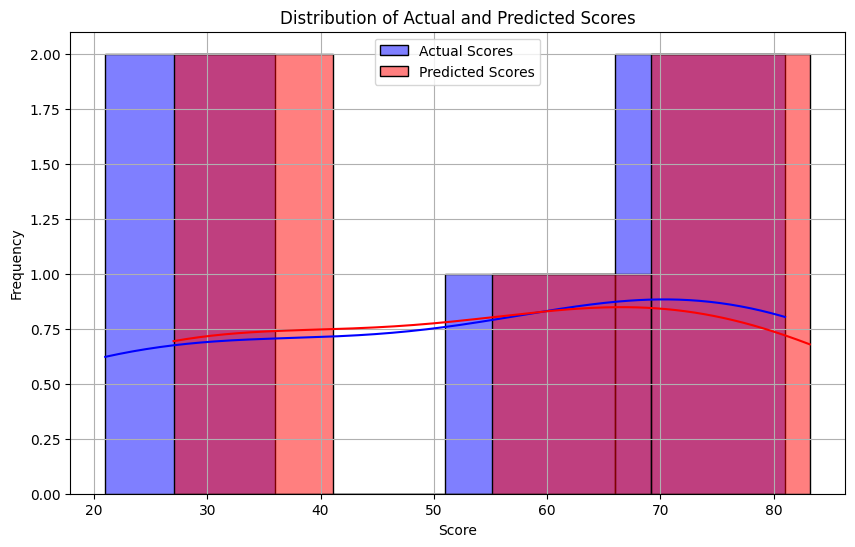

In [15]:
# Import seaborn and plot the distribution as well

# Plotting the distribution of actual and predicted scores
plt.figure(figsize=(10, 6))
sns.histplot(data=y_test, kde=True, color='blue', label='Actual Scores')
sns.histplot(data=y_test_pred, kde=True, color='red', label='Predicted Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Predicted Scores')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-16-b08b980e3126>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_test_pred)


<Axes: xlabel='Scores', ylabel='Density'>

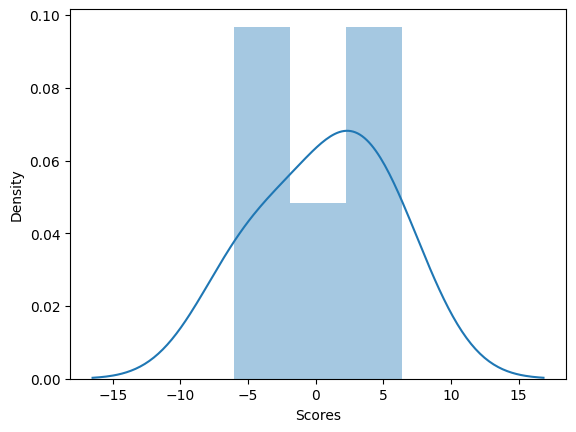

In [16]:
sns.distplot(y_test-y_test_pred)

In [17]:
# Print actual vs predicted percentage score
print("Training Data:")
print(comparison_train)
print("\nTest Data:")
print(comparison_test)

Training Data:
    Actual  Predicted
9       25  28.968503
13      42  34.777750
1       47  52.205491
22      35  39.618789
5       20  17.350010
2       27  33.809542
12      41  46.396244
15      95  88.997388
3       75  85.124557
4       30  36.714166
20      30  28.968503
17      24  21.222841
21      54  49.300867
18      67  61.887569
24      86  78.347102
7       60  56.078322
10      85  77.378894
14      17  13.477178
19      69  74.474271
6       88  91.902011

Test Data:
    Actual  Predicted
8       81  83.188141
16      30  27.032088
0       21  27.032088
23      76  69.633232
11      62  59.951153


In [18]:
# Apply ridge and grid search to improvise your model
RidgeModel=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
# RidgeModel.fit(X_train, y_train)
# yhat = RidgeModel.predict(X_test)
# print(r2_score(y_test,yhat))

ridge_regressor=GridSearchCV(RidgeModel, parameters, scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [19]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-38.430162795005444


In [20]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([83.41415757, 27.08261441, 27.08261441, 69.81688853, 60.10455351])

In [21]:
# ACTUAL Vs PREDICTED percentage Score
df2=pd.DataFrame({'Actual':y_test,'Predicted':prediction_ridge})
df2

,Actual,Predicted
8,81,83.414158
16,30,27.082614
0,21,27.082614
23,76,69.816889
11,62,60.104554


<ipython-input-22-add5ae598d46>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge) # mean = 0


<Axes: xlabel='Scores', ylabel='Density'>

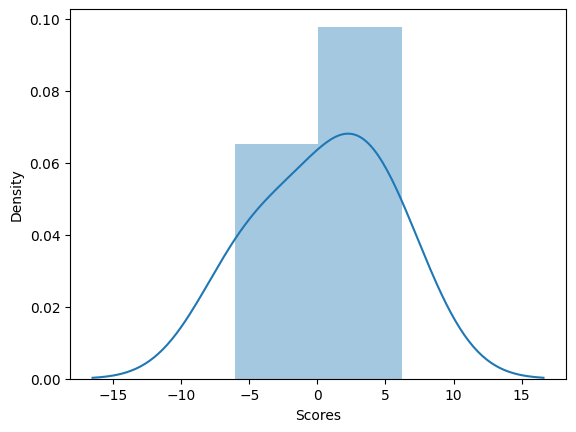

In [22]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge) # mean = 0

In [23]:
Study_hours = 9.25
percentage_pred=ridge_regressor.predict([[Study_hours]])
print("No of Hours = {}".format(Study_hours))
print("Predicted Score = {}".format(percentage_pred[0]))

No of Hours = 9.25
Predicted Score = 92.64087584985432


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [24]:
# Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error

# Calculating Mean Absolute Error (MAE)
mae1 = mean_absolute_error(y_test, prediction_ridge)

# Calculating Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, prediction_ridge)

# Calculating Root Mean Squared Error (RMSE)
rmse1 = mse1 ** 0.5

print(f'Mean absolute error : {mae1}\nMean squared error : {mse1}\nRoot mean squared error : {rmse1}')

Mean absolute error : 3.8985431068959597
Mean squared error : 18.632215669109527
Root mean squared error : 4.316505029431743
